# Dog Breed Classifier

In [1]:
import pandas as pd
import numpy as np
#glob allows to recursively retrieve files that match a specified petter.
#The reason we use glob here is to obtain all the files inside the folders in each route
from glob import glob

## The dataset

We have 8,351 dog images and 5,749 human images. 

The cell below uses the glob command to find all the images inside the folders obtained after decompressing the ZIP files. The file names are stored in two lists, ```dog_images``` and ```people_images```.

In [2]:
dog_images=glob("images\dogs\*\*\*\*")
people_images=glob("images\people\*\*\*")

print("We have {:,} dog images in total (train+dev+test)".format(len(dog_images)))
print("We have {:,} human images in total (train+dev+test)".format(len(people_images)))

We have 8,351 dog images in total (train+dev+test)
We have 13,233 human images in total (train+dev+test)


## Human detection

The **OpenCV** library will be used to detect human faces. This is an open-source library widely used for computer vision and image processing.

The algorithm to be implemented is a Haar feature-based cascade classifier. This model was first proposed in 2001 by Viola and Jones in their [research paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) "Rapid Object Detection using a Boosted Cascade of Simple features". This is a very efficient and highly accurate algorithm, extensively used even in the current deep learning era.

In simple, the algorithm uses what is known as Haar features to detect attributes in the image. These features have a similar structure to kernel matrices on CNN, with the difference that the values inside the matrix are assigned a priori (not estimated) and take the values between 0 (white) and 1 (black).

In the publication, the authors describe the 3 main contributions of their work:
* Integral image.
* Feature selection with AdaBoost.
* Combining complex classifiers in a cascade structure.

The three findings listed above contribute to the efficiency and high detection rate achieved my the technique.

---

OpenCV already has some pretrained detectors that can be found in the following [link](https://github.com/opencv/opencv/tree/master/data/haarcascades). Some of the trained classifiers include eye-detection, smile-detection, russiand plate number, and more.

For the purpose of detection faces, I will use the pre-trained detector called ```haarcascade_frontalface_alt.xml``` 

In [3]:
#import OpenCV
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

# To load a pre-trained model from OpenCV library, we should use the CascadeClassifier class. This class loads a classifier 
# and takes as argument the route and filename. Change the route below to point where the pre-trained models are saved.
route_haarcascade='C:\\Users\\USUARIO\\anaconda3\\Library\\etc\\haarcascades\\'
face_detection = cv2.CascadeClassifier(route_haarcascade+'haarcascade_frontalface_default.xml')

# imread allows to convert an image to RGB (color) pixels 
image=cv2.imread(people_images[150])

In [4]:
#The below three lines show the image in a new window.Waitkey and destroyAllWindows are necessary because otherwise
#the kernel will restart.
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# One important feature of the Haar feature-based approach is that it works well on grayscale images.
# Below we convert the RGB image to grayscale using the cvtColor class of the OpenCV library
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',image_grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#To use the model loaded before we use the detectMultiScale method, which takes as argument the image as an array. This
#method detects objects and returnes as a list of rectagles (pixel locations) where the objects were found.
#As we are using haarcascade_frontalface_default model, the algorithm will only find faces.

faces_detected = face_detection.detectMultiScale(image_grayscale)
print('In the image provided, the number of faces detected is: ', len(faces_detected))
print('The first face detected starts at pixel ({},{})'.format(faces_detected[0][0],faces_detected[0][1]))

In the image provided, the number of faces detected is:  1
The first face detected starts at pixel (67,68)


Up to this point, we have a trained algorithm that detects faces in an image and returns its positions. As a final step, we can draw rectangles around the objects to visually test if our algorithm is working.

The ```rectagle``` method of OpenCV allows to sketch rectangles on an image. The required arguments are the following:
1. The image where we want to draw.
2. Start point (pixel coordinates).
3. End point (pixel coordinates).
4. The color of the border.
5. Thickness of the border.

The method does not return anything, it solely changes the image provided as first agument to contain a rectangle enclosing the object(s) detected. The modified image will be in BGR scale and should be converted to RGB to obtain the original colors.

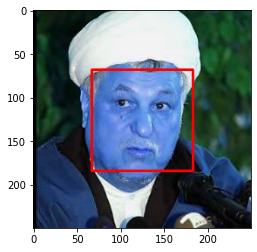

In [14]:
#Image in BGR scale
for (x,y,w,h) in faces_detected:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(image)
plt.show()

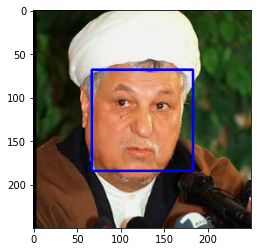

In [15]:
#Image in original colors (RGB)
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(cv_rgb)
plt.show()